<a href="https://colab.research.google.com/github/Buzon-coder/QRT-Electricity-price/blob/main/QRT_Electricity_PriceV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
#test 2 pour github

In [126]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
X_train = pd.read_csv("X_train_NHkHMNU.csv")
y_train = pd.read_csv("y_train_ZAN5mwg.csv")
X_test = pd.read_csv("X_test_final.csv")

In [128]:
#print(X_train.head())
#print(X_train.shape)
#print(X_train.head())
#print(X_train.tail())
#print(X_train["ID"].nunique())
#print(X_train["DAY_ID"].nunique()) #--> ça return 851, donc il y a 851 DAY_ID uniques, donc il y a des jours qui apparaissent plusieurs fois
#print(X_train["ID"].isna().sum()) #--> ça return 0 donc tous les ID sont présents
#print(X_train['DAY_ID'].isna().sum()) #--> ça return 0 donc tous les jours sont présents
#print(X_train["COUNTRY"].nunique())
#print(X_train["COUNTRY"].isna().sum()) #--> la colonne COUNTRY est pleine
#print(X_train["ID"].min()) # --> ça return 0
#print(X_train["ID"].max()) # --> ça return 2146, je comprends pas très bien
#print(y_train.tail())
#print(y_train['TARGET'].isna().sum())
#print(X_test.shape)
#print(X_test.head())
#print(X_test.tail())
#print(X_test["ID"].nunique())
#print(X_test["DAY_ID"].min()) #--> ça return 4
#print(X_test["DAY_ID"].max()) #--> ça return 1214
#print(X_test["DAY_ID"].nunique()) #--> ça return 365, donc il faut prédire
#regarder comment faire pour voir s'il y a des jours (DAY_ID) qui apparaissent plus de deux fois

#je vais essayer de voir si j'ai des ID et des DAY_ID en commun entre X_TRAIN et X_TEST
#print(len(set(X_train["ID"])))
common_id = set(X_train["ID"]) & set(X_test["ID"])
print("Nombre d'ID' en commun entre TRAIN et TEST:",len(common_id))

common_days = set(X_train["DAY_ID"]) & set(X_test["DAY_ID"])
print("Nombre de jours en commun entre TRAIN et TEST:",len(common_days))

#print(len(set(X_test["DAY_ID"])))
#print(len(set(X_test["ID"])))

# ==> donc il n'y a aucun jour en commun et aucun ID en commun entre TRAIN et TEST
#dans mes données TRAIN, j'ai 1494 ID et 851 jours
#dans mes données TEST, j'ai 654 ID et 365 jours

#print(max(X_train["ID"].max(), X_test["ID"].max()))
#print(X_train["ID"].max())
#print(X_test["ID"].max())
#print(max(X_train["DAY_ID"].max(), X_test["DAY_ID"].max()))
#print(min(X_train["DAY_ID"]))
#print(max(X_train["DAY_ID"]))

#print(min(X_test["DAY_ID"]))
#print(max(X_test["DAY_ID"]))
#counts = X_train["DAY_ID"].value_counts()
#counts_more_than_2 = counts[counts>2]
#print(len(counts_more_than_2))

#counts_test = X_test["DAY_ID"].value_counts()
#counts_test_more_than_2 = counts_test[counts_test>2]
#print(len(counts_test_more_than_2))
print(X_test.head())

Nombre d'ID' en commun entre TRAIN et TEST: 0
Nombre de jours en commun entre TRAIN et TEST: 0
     ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
0  1115     241      FR        0.340083       -0.433604       -0.423521   
1  1202    1214      FR        0.803209        0.780411        0.601610   
2  1194    1047      FR        0.795540        0.721954        1.179158   
3  1084    1139      FR        0.172555       -0.723427       -0.044539   
4  1135     842      FR        0.949714        0.420236        0.617391   

   FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...  \
0        0.423521       0.165333       0.519419      -0.165333  ...   
1       -0.601610       0.342802       0.555367      -0.342802  ...   
2       -1.179158       1.620928       0.666901      -1.620928  ...   
3        0.044539            NaN      -0.205276            NaN  ...   
4       -0.617391       0.608561      -0.240856      -0.608561  ...   

   FR_RESIDUAL_LOAD   DE_RA

Donc il n'y a aucun jour en commun et aucun ID en commun entre TRAIN et TEST.
Dans mes données TRAIN, j'ai 1494 ID et 851 jours
Dans mes données TEST, j'ai 654 ID et 365 jours
J'ai donc un total de 2148 ID et 1216 jours.
C'est bien ce que je trouve lorsque je regarde l'ID max (je trouve 2147) et le DAY_ID max (je trouve 1215).
Les jours de mes données d'entraînement s'étalent de DAY_ID = 0 à DAY_ID = 1215, et les jours de mes données test s'étalent de DAY_ID = 4 à DAY_ID = 1214.
Donc l'objectif n'est pas de prédire les valeurs des futures (variation journalière du prix de contrats à terme sur l'électricité) dans le futur, mais en fonction des données météorologiques, énergétiques, ...

Aucun jour(=DAY_ID) dans X_train ou dans X_test n'apparaît plus de deux fois, donc dans mes données TRAIN, j'ai 643 jours qui apparaissent 2 fois, et 208 jours qui n'apparaissent qu'une fois, et dans mes données TEST, j'ai 289 jours qui apparaissent 2 fois, et 76 jours qui n'apparaissent qu'une fois.

In [174]:
# je trie X_train par DAY_ID croissant (donc par dates) et j'aligne les ID de y_train avec ceux de DAY_ID

X_train = X_train.sort_values(["DAY_ID", "COUNTRY"]).reset_index(drop=True)
y_train = y_train.set_index("ID").loc[X_train["ID"]].reset_index()
assert all(X_train["ID"].values == y_train["ID"].values)
print("Les ID sont bien alignés avec X_train")
#print(y_train["ID"])
#print(X_train["ID"])
#y_train = y_train.sort_values(["DAY_ID", "COUNTRY"]).reset_index(drop=True)

#print(X_train.head())

Les ID sont bien alignés avec X_train
     ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
0  1057       0      FR        0.048418       -0.465067       -0.079296   
1  1179       1      FR        0.966997        1.222131        0.331356   
2   111       2      DE       -0.068972       -0.667390       -1.102015   
3  1327       2      FR       -0.068972       -0.667390       -1.102015   
4   800       3      DE       -0.134670       -0.834564       -1.051716   

   FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...  \
0        0.079296            NaN       0.650577            NaN  ...   
1       -0.331356       0.405549       0.778627      -0.405549  ...   
2        1.102015      -1.080403       0.256736       1.080403  ...   
3        1.102015      -1.080403       0.256736       1.080403  ...   
4        1.051716      -1.881881      -0.612133       1.881881  ...   

   FR_RESIDUAL_LOAD   DE_RAIN   FR_RAIN   DE_WIND   FR_WIND   DE_TEMP  \
0         -

Analyse exploratoire

In [130]:
X_train.describe()
#y_train.describe()
#X_train.corrwith(y_train["TARGET"]).sort_values(ascending=False)

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,1494.000000,1494.000000,1494.000000,1494.000000,1469.000000,1469.000000,1370.000000,1424.000000,1370.000000,1424.000000,...,1494.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1494.000000,1494.000000,1494.000000
mean,1072.759036,591.861446,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,0.072643,...,-0.153688,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510
std,618.013179,345.065043,0.673412,0.918995,0.970226,0.970226,0.957443,1.075830,0.957443,1.075830,...,0.896325,0.984233,1.051781,1.056243,1.054692,0.972394,1.003356,1.097768,1.033853,1.098624
min,0.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.678936,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790
25%,540.250000,292.250000,-0.037421,-0.716771,-0.875213,-0.638867,-0.977214,-0.851500,-0.452252,-0.794843,...,-0.802333,-0.642117,-0.503927,-0.652135,-0.672614,-0.618259,-0.647948,-0.624238,-0.458038,-0.522968
50%,1077.500000,591.000000,0.357061,-0.394166,-0.164287,0.164287,-0.306899,0.099455,0.306899,-0.099455,...,-0.460160,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.008493,0.063312,0.054056
75%,1597.500000,885.750000,0.922057,0.650533,0.638867,0.875213,0.452252,0.794843,0.977214,0.851500,...,0.382191,0.335237,0.154351,0.635050,0.824781,0.651832,0.699131,0.676415,0.641446,0.599094
max,2146.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,2.918326,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818


In [146]:
# Je veux voir quelles features de X_train ne sont pas des floats ou des int, afin de les enlever
# pour pouvoir faire ma corrélation entre les features de X_train et mes TARGET

no_floats_col = X_train.select_dtypes(exclude=['float', 'int']).columns
#print(list(no_floats_col)) #--> me renvoie COUNTRY, donc j'enlève cette colonne le temps de voir la corrélation
#X_train.dtypes #--> renvoie le type de chaque colonne de X_train

##je garde maintenant que les colonnes numériques
#X_train_num = X_train.select_dtypes(include=['float', 'int'])
#corr1 = X_train_num.corrwith(y_train["TARGET"]).sort_values(ascending=False)
#print(corr1.head(10))
#print(X_train.index)
#print(y_train.index)
##--> j'obtiens que les features les plus corrélées à la TARGET sont : DE_NET_IMPORT, DE_RESIDUAL_LOAD, DE_GAS, DE_HYDRO, FR_HYDRO, DE_COAL
##je refais la même chose mais cette fois-ci en encodant la colonne COUNTRY en 2 colonnes : COUNTRY_FR et COUNTRY_DE
X_train_encode = X_train.copy()
X_train_encode["COUNTRY_FR"] = (X_train_encode["COUNTRY"] == "FR").astype(int)
X_train_encode["COUNTRY_DE"] = (X_train_encode["COUNTRY"] == "DE").astype(int)
##print(X_train_encode.head())
X_train_encode = X_train_encode.drop(columns = ["COUNTRY"])
corrs = X_train_encode.corrwith(y_train["TARGET"], method = 'spearman') # Remarque : la fonction corrwith calcule la corrélation entre les features de X_train et les valeurs TARGET de y_train ligne par ligne
                                                                        # Remarque 2 :
corrs_abs = corrs.abs().sort_values(ascending=False) # on regarde les valeurs absolues des corrélations des features avec la TARGET. En effet, une corrélation négative mais avec une valeur absolue élevée est aussi une corrélation forte, c'est simplement
                                                     # qu'elle agit dans le sens inverse de l'évolution du prix du futures (qd feature augmente, cible diminue, ou l'inverse). exemple : si augmentation du vent, prix diminue car on a + d'électricité
print(corrs_abs.head(20))
print(corrs_abs.tail(18))
# --> j'obtiens que les features les plus corrélées à la TARGET sont : DE_NET_IMPORT, DE_RESIDUAL_LOAD, DE_GAS, DE_HYDRO, FR_HYDRO, COUNTRY_DE
# Donc les pays ont leur importance, j'ai intérêt à les encoder

#print(X_train.head())
#print(y_train.head())


DE_NET_IMPORT       0.199016
DE_NET_EXPORT       0.199016
DE_WINDPOW          0.185688
DE_RESIDUAL_LOAD    0.175793
FR_WINDPOW          0.155568
DE_HYDRO            0.151367
DE_GAS              0.129905
CARBON_RET          0.104375
DE_WIND             0.089331
DE_COAL             0.072380
GAS_RET             0.066800
FR_HYDRO            0.064682
FR_WIND             0.064479
DE_CONSUMPTION      0.063617
FR_RAIN             0.056540
FR_DE_EXCHANGE      0.050763
DE_FR_EXCHANGE      0.050763
FR_COAL             0.048463
FR_TEMP             0.044952
DE_LIGNITE          0.044180
dtype: float64
FR_TEMP             0.044952
DE_LIGNITE          0.044180
DE_RAIN             0.037053
DE_SOLAR            0.032740
FR_SOLAR            0.028839
FR_CONSUMPTION      0.027242
ID                  0.027199
COUNTRY_FR          0.027114
COUNTRY_DE          0.027114
DE_TEMP             0.019125
FR_RESIDUAL_LOAD    0.018241
COAL_RET            0.017573
FR_GAS              0.016334
FR_NET_EXPORT       0.007698

J'obtiens que les features les plus corrélées (en valeur absolue) de X_train et avec les TARGET (de y_train) sont par ordre décroissant : DE_NET_IMPORT, DE_NET_EXPORT, DE_WINDPOW, DE_RESIDUAL_LOAD, FR_WINDPOW,DE_HYDRO, DE_GAS, CARBON_RET, DE_WIND, DE_COAL, GAS_RET, FR_HYDRO,FR_WIND, DE_CONSUMPTION, FR_RAIN, FR_DE_EXCHANGE, DE_FR_EXCHANGE, FR_COAL, FR_TEMP, DE_LIGNITE.


De même, j'obtiens les features les moins corrélées (en valeur absolue) de X_train avec les TARGET sont (de la plus corrélées à la moins corrélée) : DE_RAIN, DE_SOLAR, FR_SOLAR, FR_CONSUMPTION, ID, COUNTRY_FR, COUNTRY_DE, DE_TEMP, FR_RESIDUAL_LOAD, COAL_RET, FR_GAS, FR_NET_EXPORT, FR_NET_IMPORT, DE_NUCLEAR, DAY_ID, FR_NUCLEAR.

Regarder les corrélations permet de comprendre quelles features influencent TARGET, et permet d'interpréter phyisquement le modèle. Ces features représentent les effets dominants.

Evolution des futures (TARGET) en fonction du temps.

In [148]:
# on trace l'évolution des valeurs des futures en fonction du temps par pays
# dans un premier temps, on regroupe les features et les TARGET dans un même dataset qu'on nomme X_train_full

X_train_full = X_train.merge(y_train, on = "ID", how = "left")
#print(X_train_full.head())
#X_train_full.shape




(1494, 36)

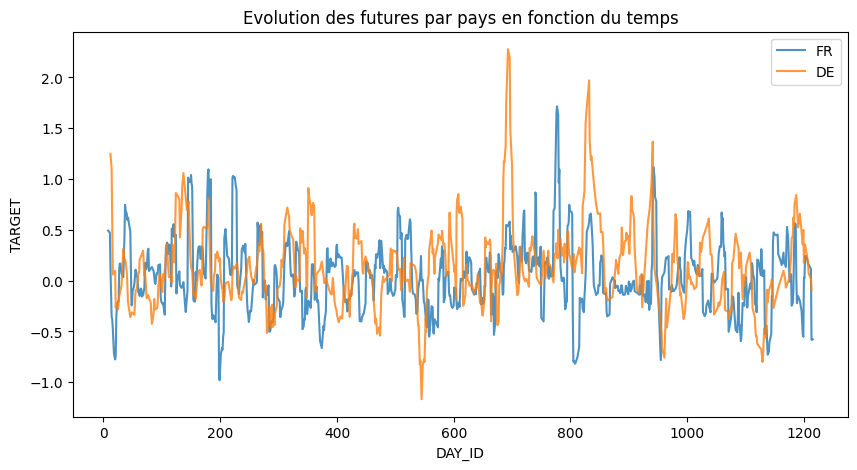

In [154]:
plt.figure(figsize=(10,5))

for country in ["FR", "DE"]:
  subset = X_train_full[X_train_full["COUNTRY"] == country]
  #print(subset.head())
  subset_sorted = subset.sort_values("DAY_ID")
  plt.plot(subset_sorted["DAY_ID"], subset_sorted["TARGET"].rolling(7).mean(), label=country, alpha=0.8)

plt.xlabel("DAY_ID")
plt.ylabel("TARGET (moyenne mobile sur 7 jours)")
plt.title("Tendance de l'évolution des futures par pays en fonction du temps")
plt.legend()
plt.show()

Prétraitement des données

In [168]:
# Nettoyage des données

# Comme mes données TEST et mes données TRAIN appartiennent au même univers statistique (mêmes pays, même période, mêmes phénomènes physiques),
# il n'y a pas de chronologie causale stricte entre TRAIN et TEST : ils ne représentent pas passé et futur, mais 2 sous-échantillons du même phénomène.
# --> Donc on peut estimer les valeurs manquantes en utilisant toute l'information disponible sur les features, avant de découper le dataset.
# Dans un premier temps, je regarde comment se comportent les features de mes données d'entraînement, puis ensuite je ferai mes splits, et je remplirai les valeurs vides.
# Ensuite j'essaierai de détecter les outliers s'il y en a

# On regarde d'abord où sont situées les valeurs manquantes
NaN_count_train = X_train.isna().sum()
#print(NaN_count)
NaN_percent_train = 100 * NaN_count_train/len(X_train)
print(len(X_train))
print(NaN_percent_train.sort_values(ascending=False).head(12)) # --> Il y a 12 colonnes qui contiennent des valeurs manquantes, et cette ligne
                                                               # renvoie le pourcentage de valeurs manquantes pour chacune de ces colonnes

NaN_count_test = X_test.isna().sum()
NaN_percent_test = 100 * NaN_count_test/len(X_test)
print(NaN_percent_test.sort_values(ascending=False).head(12)) # --> Les 12 mêmes colonnes contiennent des valeurs manquantes dans X_test

1494
DE_NET_IMPORT     8.299866
DE_NET_EXPORT     8.299866
FR_RAIN           6.291834
FR_TEMP           6.291834
DE_WIND           6.291834
FR_WIND           6.291834
DE_TEMP           6.291834
DE_RAIN           6.291834
FR_NET_IMPORT     4.685408
FR_NET_EXPORT     4.685408
DE_FR_EXCHANGE    1.673360
FR_DE_EXCHANGE    1.673360
dtype: float64
DE_NET_IMPORT     7.186544
DE_NET_EXPORT     7.186544
FR_RAIN           6.116208
FR_TEMP           6.116208
DE_WIND           6.116208
FR_WIND           6.116208
DE_TEMP           6.116208
DE_RAIN           6.116208
FR_NET_IMPORT     3.669725
FR_NET_EXPORT     3.669725
DE_FR_EXCHANGE    1.376147
FR_DE_EXCHANGE    1.376147
dtype: float64


J'ai donc FR_TEMP, DE_WIND, FR_WIND, DE_TEMP, DE_RAIN qui sont mes variables météorologiques qui ont des valeurs manquantes.
Pour remplacer leurs valeurs, je peux faire une interpolation linéaire.

J'ai également les variables d'utilisation électrique suivantes qui ont des valeurs manquantes :
DE_NET_IMPORT, DE_NET_EXPORT, FR_NET_IMPORT, FR_NET_EXPORT, DE_FR_EXCHANGE, FR_DE_EXCHANGE.



In [184]:
# Dans un premier temps, on va fusionner X_train et X_test afin de déterminer les valeurs manquantes des features dans chacun des deux.
# Je les fusionne en un X_all
X_all = pd.concat([X_train, X_test], ignore_index=True).sort_values(["COUNTRY", "DAY_ID"])
#print(X_train.head())
#print(X_all.shape)
#print(X_all.head())

# Maintenant je veux faire une interpolation temporelle pour prédire les valeurs manquantes (les NaN) de FR_TEMP, DE_WIND, FR_WIND, DE_TEMP, DE_RAIN
# Remarque : on fait cette interpolation temporelle par pays
# prédiction des valeurs de FR_TEMP
before = X_all["FR_TEMP"].copy()
X_all["FR_TEMP"] = X_all.groupby("COUNTRY")["FR_TEMP"].transform(lambda s: s.interpolate(method="linear")) # --> on a modifié les valeurs manquantes
# vérification
print(X_all["FR_TEMP"].isna().sum()) # --> ça retourne bien 0
# lignes pour lesquelles les valeurs ont changé :
mask_changed = before !=X_all["FR_TEMP"]
# intersection entre les lignes pour lesquelles les valeurs ont changé et les valeurs de X_all qui n'étaient pas des NaN
mask_changed_non_nan = before.notna() & mask_changed
print("Nombre de valeurs non NaN modifiées:", mask_changed_non_nan.sum())

#print(before.head())
#print(X_all["FR_TEMP"].head())

# => donc toutes les valeurs NaN ont bien été remplacées, et toutes les valeurs qui n'étaient pas NaN n'ont pas été changées, c'est ce qu'on voulait!!

# on fait pareil avec les autres features météorologiques (interpolation temporelle)



0
Nombre de valeurs non NaN modifiées: 0
2       0.641235
4      -0.951057
1725    0.701597
6       1.459745
2064   -0.894852
Name: FR_TEMP, dtype: float64
2       0.641235
4      -0.951057
1725    0.701597
6       1.459745
2064   -0.894852
Name: FR_TEMP, dtype: float64
